<a href="https://colab.research.google.com/github/isarps/ai-python/blob/main/Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd

url = 'https://raw.githubusercontent.com/isarps/ai-python/main/exams.csv'
job = pd.read_csv(url, sep = ',')
job.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [90]:
# Discretização
attribute= 'math score'
category= ['baixa', 'alta']
bin = job.copy()
bin[attribute]=pd.cut(x=bin[attribute], bins=[0,50,100],labels=category)

In [77]:
#job['math score'] = job['math score'].astype(float)
#job['reading score'] = job['reading score'].astype(float)
#job['writing score'] = job['writing score'].astype(float)

In [93]:
bin.dtypes

gender                           object
race/ethnicity                   object
parental level of education      object
lunch                            object
test preparation course          object
math score                     category
reading score                     int64
writing score                     int64
dtype: object

In [94]:
bin.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                      2
reading score                  71
writing score                  74
dtype: int64

In [95]:
# Verifica valores nulos
for attribute in bin:
    null_values = bin[attribute].isnull().sum()
    if null_values > 0:
        print(attribute + ': ' + str(null_values)) 

In [96]:
y = bin[['math score']]
x = bin.drop(['math score'], axis=1)
x.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,some college,standard,completed,70,78
1,male,group D,associate's degree,standard,none,93,87
2,female,group D,some college,free/reduced,none,76,77
3,male,group B,some college,free/reduced,none,70,63
4,female,group D,associate's degree,standard,none,85,86


In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import numpy as np

categorical_features_indices = np.where(x.dtypes != float)[0]

print(categorical_features_indices)

[0 1 2 3 4 5 6]


In [99]:
model = CatBoostClassifier(
    custom_loss=[metrics.Precision()], #metrica de teste da arvore
    random_seed=42, #para dar o mesmo resultado
    logging_level='Silent', #para não plotar o log
    auto_class_weights='Balanced' #para balanceamento
)

model.fit(
    x_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(x_test, y_test),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Acuracy: 0.92
Precision: 0.93
Matriz de Confusão


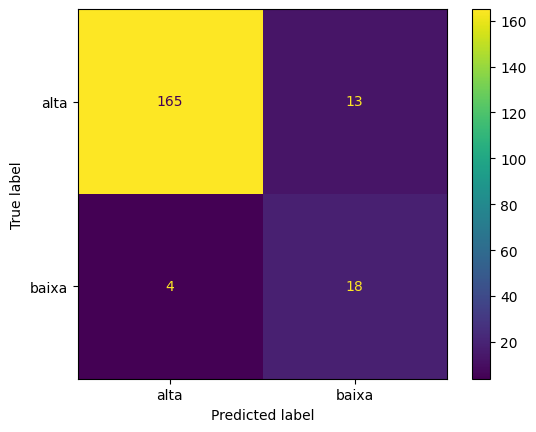

In [101]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(x_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acuracy: {:.2f}".format(acc))

# Precision
pre = precision_score(y_test, y_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train['math score'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train['math score'].unique())
disp.plot()

In [102]:
# One Hot
x_one_hot = x.copy()
for attribute in x_one_hot.columns:
    if x_one_hot[attribute].dtype == object:
        vocabulary = x_one_hot[attribute].unique()
        if len(vocabulary) > 1:
            x_one_hot = pd.concat([x_one_hot,pd.get_dummies(x_one_hot[attribute], prefix=attribute)],axis=1)
        x_one_hot.drop([attribute],axis=1, inplace=True)

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_one_hot, y, test_size=0.2)

In [104]:
x_train.head(5)

,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
482,78,74,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
478,86,84,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
848,74,75,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
333,56,53,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
894,53,55,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1


In [107]:
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo árvore de decisão com profundidade máxima 6
model = MLPClassifier(max_iter=1000, early_stopping=True)

# Treina o modelo
model.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(early_stopping=True, max_iter=1000)

Acurácia: 0.85
Precision: 0.81
Matriz de Confusão


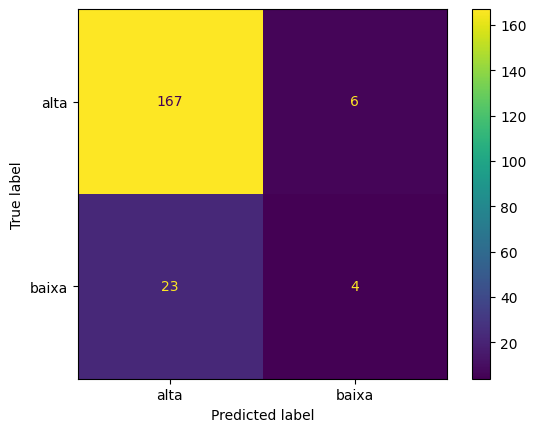

In [108]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(x_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

# Precision
pre = precision_score(y_test, y_pred, average = 'weighted')
print("Precision: {:.2f}".format(pre))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train['math score'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train['math score'].unique())
disp.plot()